In [1]:
import numpy as np
from time import time
from lloyd import update_lloyd
from utils import calc_sq_distances, fill_empty_clusters
from kernels import build_kernel_matrix
from quality import calc_silhouettes
from elkan import update_elkan, start_elkan


In [2]:
from kernel_kmeans import KKMeans

In [3]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_circles
from sklearn.cluster import KMeans

In [4]:
def visualize(data, labels):
    if len(data[0]) > 3:
        raise Exception("Dimensionality is too high for visualization")
    elif len(data[0]) == 1:
        plt.scatter(data, [0 for x in range(len(data))], c = labels)
    elif len(data[0]) == 2:
        plt.scatter(data[:,0], data[:,1], c = labels)
    elif len(data[0]) == 3:
        fig = plt.figure()
        ax = fig.add_subplot(projection = "3d")
        ax.scatter(data[:,0], data[:,1], data[:,2], c = labels)

In [5]:
n_samples = 500
n_features = 3
n_clusters = 300
iters = 20
for seed in range(iters):
    data, labels = make_blobs(n_samples, n_features, centers=n_clusters, random_state=seed)
    kkm = KKMeans(n_clusters=n_clusters, init="random", algorithm="lloyd", rng=seed)
    kkme = KKMeans(n_clusters=n_clusters, init="random", algorithm="elkan", rng=seed)
    kkm.fit(data)
    kkme.fit(data)
    assert all(kkm.labels_ == kkme.labels_)
    assert np.isclose(kkm.quality_, kkme.quality_)
    assert np.isclose(kkm.quality_, kkme.quality_)



Warning! Empty cluster encountered, consider using different n_cluster. Random element assigned to emtpy cluster
Warning! Empty cluster encountered, consider using different n_cluster. Random element assigned to emtpy cluster
Warning! Empty cluster encountered, consider using different n_cluster. Random element assigned to emtpy cluster
Warning! Empty cluster encountered, consider using different n_cluster. Random element assigned to emtpy cluster
Warning! Empty cluster encountered, consider using different n_cluster. Random element assigned to emtpy cluster
Warning! Empty cluster encountered, consider using different n_cluster. Random element assigned to emtpy cluster
Warning! Empty cluster encountered, consider using different n_cluster. Random element assigned to emtpy cluster
Warning! Empty cluster encountered, consider using different n_cluster. Random element assigned to emtpy cluster
Warning! Empty cluster encountered, consider using different n_cluster. Random element assigned 

In [6]:
kkm = KKMeans(n_clusters=100, init = "kmeans++", n_init=10, max_iter=100, algorithm="lloyd", verbose=False, rng=0, q_metric="inertia")

In [7]:
kkm.fit(data)

Best inertia: 1495.351314966862 Found at init: 4


In [8]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=n_clusters, init="random")
km.fit(data)

KMeans(init='random', n_clusters=300)

In [9]:
km.inertia_

296.0795945223642

In [10]:
kkm = KKMeans(n_clusters = 5, verbose = False, init = "kmeans++", kernel = "linear", rng = 0, q_metric="silhouette", n_init=3, tol = 1e-4, algorithm="lloyd")

In [11]:
start = time()
kkm.fit(x)
end = time()
print(end - start)
visualize(x, kkm.labels_)

NameError: name 'x' is not defined

In [ ]:
x, l = make_circles(7000, factor = 0.4, random_state=0)

In [ ]:
kkm = KKMeans(n_clusters = 2, verbose = True, init = "kmeans++", kernel = "rbf", rng = 0, tol = 1e-4, variance=0.4, n_init = 5, q_metric="inertia", algorithm="lloyd")

In [ ]:
start = time()
kkm.fit(x)
end = time()
print(end - start)
visualize(x, kkm.labels_)

NameError: name 'x' is not defined

In [ ]:
visualize(x, kkm.predict(x))

NameError: name 'x' is not defined

In [ ]:
all(kkm.predict(x) == kkm.labels_)

NameError: name 'x' is not defined

In [12]:
n_c = 75
size = 10000
r_s = 0
x, labels, centers = make_blobs(size, centers=n_c, return_centers = True, random_state = r_s, n_features = 2)

In [13]:
seed = 0
tol = 1e-4
inits= 3
initmethod = "kmeans++"
kkml =  KKMeans(n_clusters = n_c, verbose = True, init =initmethod, kernel = "linear", rng=seed, tol=tol, n_init=inits, q_metric="inertia", algorithm="lloyd")
kkme =  KKMeans(n_clusters = n_c, verbose = True, init =initmethod, kernel = "linear", rng=seed, tol=tol, n_init=inits, q_metric="inertia", algorithm="elkan")

Iteration: 1 inertia: 10150.586310273538
Iteration: 2 inertia: 9642.438561275358
Iteration: 3 inertia: 9396.497454618824
Iteration: 4 inertia: 9248.267253620694
Iteration: 5 inertia: 9121.95073993312
Iteration: 6 inertia: 9034.350220384904
Iteration: 7 inertia: 8970.54315845421
Iteration: 8 inertia: 8902.572238621644
Iteration: 9 inertia: 8835.10200513467
Iteration: 10 inertia: 8789.322458384864
Iteration: 11 inertia: 8749.277442901706
Iteration: 12 inertia: 8714.135492063046
Iteration: 13 inertia: 8682.633316476986
Iteration: 14 inertia: 8652.309432947191
Iteration: 15 inertia: 8629.512298020283
Iteration: 16 inertia: 8610.679949675003
Iteration: 17 inertia: 8594.663244597228
Iteration: 18 inertia: 8577.928811808299
Iteration: 19 inertia: 8563.912468043569
Iteration: 20 inertia: 8551.516610716759
Iteration: 21 inertia: 8542.622068285513
Iteration: 22 inertia: 8535.671045584579
Iteration: 23 inertia: 8529.664825868258
Iteration: 24 inertia: 8523.741670149044
Iteration: 25 inertia: 8520

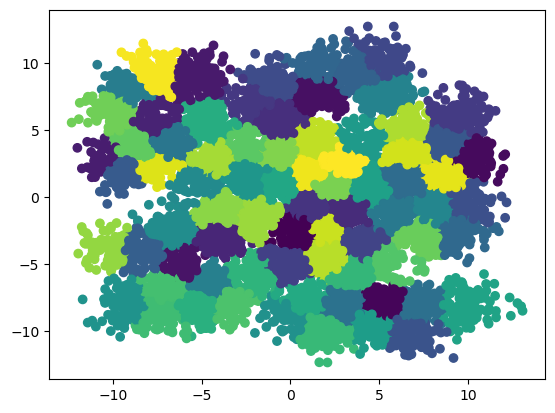

In [14]:
start = time()
kkml.fit(x)
end = time()
print(end - start)
visualize(x, kkml.labels_)

Iteration: 1 inertia: 10150.586310273538
Iteration: 2 inertia: 9642.438561275358
Iteration: 3 inertia: 9396.497454618824
Iteration: 4 inertia: 9248.267253620696
Iteration: 5 inertia: 9121.95073993312
Iteration: 6 inertia: 9034.350220384904
Iteration: 7 inertia: 8970.54315845421
Iteration: 8 inertia: 8902.572238621646
Iteration: 9 inertia: 8835.102005134668
Iteration: 10 inertia: 8789.322458384864
Iteration: 11 inertia: 8749.277442901706
Iteration: 12 inertia: 8714.135492063046
Iteration: 13 inertia: 8682.633316476986
Iteration: 14 inertia: 8652.30943294719
Iteration: 15 inertia: 8629.512298020283
Iteration: 16 inertia: 8610.679949675003
Iteration: 17 inertia: 8594.663244597228
Iteration: 18 inertia: 8577.9288118083
Iteration: 19 inertia: 8563.912468043569
Iteration: 20 inertia: 8551.51661071676
Iteration: 21 inertia: 8542.622068285513
Iteration: 22 inertia: 8535.671045584579
Iteration: 23 inertia: 8529.664825868258
Iteration: 24 inertia: 8523.741670149044
Iteration: 25 inertia: 8520.18

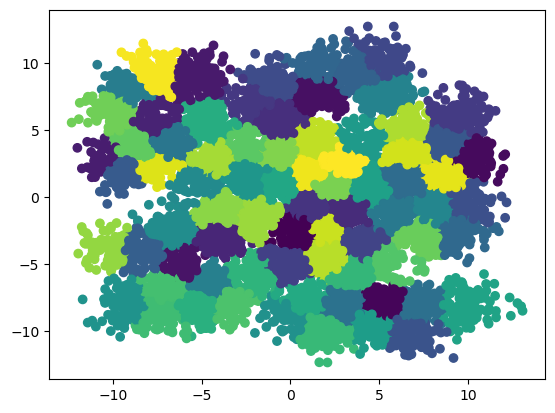

In [15]:
start = time()
kkme.fit(x)
end = time()
print(end - start)
visualize(x, kkme.labels_)

In [16]:
print(all(kkme.labels_ == kkml.labels_))

True


In [17]:
iter = 20
elkan_store = []
lloyd_store = []

n_c = 200
size = 2000

tol = 1e-4
inits= 3
initmethod = "kmeans++"
verb = False
max_iter = 100

for i in range(iter):
    print(i)
    x, labels, centers = make_blobs(size, centers=n_c, return_centers = True, random_state = i, n_features = 2)

    kkml =  KKMeans(n_clusters = n_c, verbose=verb, init =initmethod, kernel = "linear", rng=i, tol=tol, n_init=inits, q_metric="inertia", algorithm="lloyd", max_iter=max_iter)
    kkme =  KKMeans(n_clusters = n_c, verbose=verb, init =initmethod, kernel = "linear", rng=i, tol=tol, n_init=inits, q_metric="inertia", algorithm="elkan", max_iter = max_iter)

    start = time()
    kkml.fit(x)
    end = time()
    lloyd_store.append(end - start)
    start = time()
    kkme.fit(x)
    end = time()
    elkan_store.append(end - start)
    assert(all(kkml.labels_ == kkme.labels_))
    assert(np.isclose(kkml.quality_, kkme.quality_))
    

print(sum(elkan_store)/len(elkan_store))
print(sum(lloyd_store)/len(lloyd_store))

0
Best inertia: 605.090468479596 Found at init: 3
Best inertia: 605.090468479596 Found at init: 3
1
Best inertia: 638.7599633951181 Found at init: 1
Best inertia: 638.7599633951179 Found at init: 1
2
Best inertia: 590.7005447545939 Found at init: 3
Best inertia: 590.7005447545941 Found at init: 3
3
Best inertia: 595.793743328247 Found at init: 1
Best inertia: 595.793743328247 Found at init: 1
4
Best inertia: 601.8825845860483 Found at init: 1
Best inertia: 601.8825845860482 Found at init: 1
5
Best inertia: 610.8816907608619 Found at init: 1
Best inertia: 610.8816907608618 Found at init: 1
6
Best inertia: 598.5662941933681 Found at init: 2
Best inertia: 598.5662941933681 Found at init: 2
7
Best inertia: 632.9565258529224 Found at init: 2
Best inertia: 632.9565258529224 Found at init: 2
8
Best inertia: 611.7916121010996 Found at init: 3
Best inertia: 611.7916121010996 Found at init: 3
9
Best inertia: 590.5503715850965 Found at init: 2
Best inertia: 590.5503715850967 Found at init: 2
10
B

In [18]:
print(sum(elkan_store)/len(elkan_store))
print(sum(lloyd_store)/len(lloyd_store))

1.5394568681716918
1.694760298728943


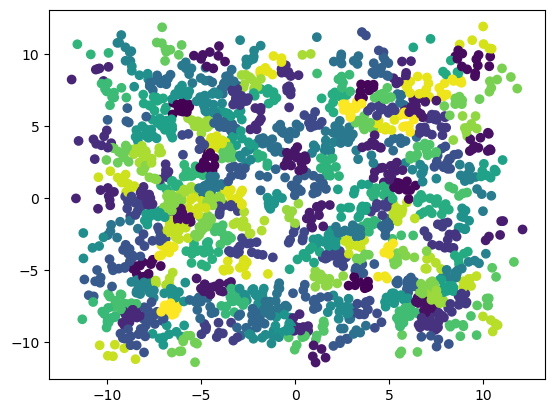

In [ ]:
visualize(x, kkml.labels_)

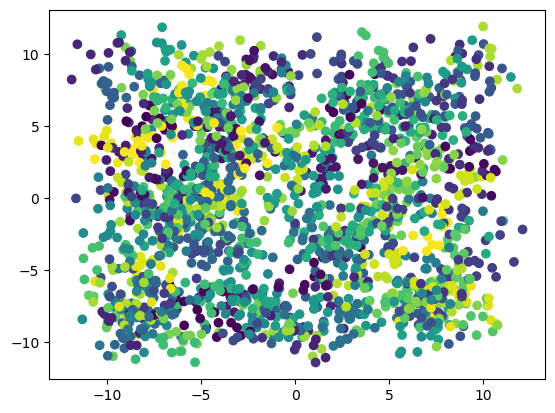

In [ ]:
visualize(x, labels)

In [ ]:
help(KKMeans)

Help on class KKMeans in module __main__:

class KKMeans(builtins.object)
 |  KKMeans(n_clusters=8, init='kmeans++', n_init=3, max_iter=300, tol=0.0001, q_metric='inertia', verbose=False, rng=None, algorithm='elkan', kernel='linear', **kwargs)
 |  
 |  Kernel K-Means Clustering.
 |  
 |  Read more in the thesis. TODO
 |  Designed to mimic sklearn.cluster.KMeans
 |  limitations: kernel matrix
 |  
 |  Parameters 
 |  ----------
 |  
 |  n_clusters: int, default=8
 |      The number of clusters to form.
 |  
 |  init: {kmeans++, random, truerandom} or arraylike, default = kmeans++
 |      Initialization method. 
 |      kmeans++: heuristic to choose "good" starting centers
 |          For more, see: thesis or
 |          Arthur and Vassilvitskii, Kmeans++ the 
 |          advantage of carefull seeding, 2007
 |      random: Randomly takes existing datapoints as centers
 |      truerandom: assigns random labels to each datapoint
 |      
 |      If arraylike is passed, its content are used